# Brightness temperature and backscatter of a three-layer snow scenario (DMRT-BIC)

In [1]:
import datetime
import numpy as np
!pip install https://rshub.zju.edu.cn/projects/rstool-0.0.tar.gz -q

In [2]:
# Define user token
token = '6uf0z22#$m!!0095xo**1vy1s*04k!'
project_name = 'Snow Demo 3'
task_name1 = 'Demo 1 Active t10'
task_name2 = 'Demo 2 Passive t10'

In [3]:
# ============== CHANGE YOUR INPUT PARAMETERS HERE ==============
# ====== Parameters not define will be set to default values ======
# Step 1: Define Scenario flag
# 1: Bare soil
# 2: Snow
# 3: Vegetation covered soil
scenario_flag = 2

# Step 2: Define observation description
# 1) Observation mode
# 1: Active (Backscatter)
# 2: Passive (Brightness temperature)
output_var = 2

# 2) Observation characteristics
fGHz = [1.41, 6.925, 10.65]

# angle=[30, 40, 50] # Incident Angle
angle = np.arange(0,90,5)
angle = angle.tolist()


# Step 3: Define Algorithm flag
# 1: DMRT-QMS; 2: DMRT-BIC
algorithm1 = 1
algorithm2 = 2

# Step 4: Describe your scenario (Demo shows 3-layer snow)
depth=[20,20,20] # [cm]
rho=[0.3,0.3,0.3] # [g/m3]
dia=[0.15,0.15,0.15] # Grain size diameter [mm]
tau=[0.1,0.1,0.1] # stickness
Tsnow=[260,260,260] # Snow temperature [K]

Tg=270 # Ground Temperature [K]

In [4]:
data1 = {
    'scenario_flag': scenario_flag, 
    'output_var': output_var,'fGHz': fGHz,
    'angle':angle,
    'algorithm':algorithm1,
    'depth': depth,'rho':rho,'dia':dia,'tau':tau,'Tsnow':Tsnow,'Tg':Tg,
    'project_name':project_name,
    'task_name':task_name1,
    'token':'6uf0z22#$m!!0095xo**1vy1s*04k!',
    'level_required':1
}

data2 = {
    'scenario_flag': scenario_flag, 
    'output_var': output_var,'fGHz': fGHz,
    'angle':angle,
    'algorithm':algorithm2,
    'depth': depth,'rho':rho,'dia':dia,'tau':tau,'Tsnow':Tsnow,'Tg':Tg,
    'project_name':project_name,
    'task_name':task_name2,
    'token':'6uf0z22#$m!!0095xo**1vy1s*04k!',
    'level_required':1
}

## Run models

In [5]:
from rstool import submit_jobs
result1=submit_jobs.run(data1)
result2=submit_jobs.run(data2)

{"scenario_flag": 2, "output_var": 2, "fGHz": [1.41, 6.925, 10.65], "angle": [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85], "algorithm": 1, "depth": [20, 20, 20], "rho": [0.3, 0.3, 0.3], "dia": [0.15, 0.15, 0.15], "tau": [0.1, 0.1, 0.1], "Tsnow": [260, 260, 260], "Tg": 270, "project_name": "Snow Demo 3", "task_name": "Demo 1 Active t10", "token": "6uf0z22#$m!!0095xo**1vy1s*04k!", "level_required": 1}


{"scenario_flag": 2, "output_var": 2, "fGHz": [1.41, 6.925, 10.65], "angle": [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85], "algorithm": 2, "depth": [20, 20, 20], "rho": [0.3, 0.3, 0.3], "dia": [0.15, 0.15, 0.15], "tau": [0.1, 0.1, 0.1], "Tsnow": [260, 260, 260], "Tg": 270, "project_name": "Snow Demo 3", "task_name": "Demo 2 Passive t10", "token": "6uf0z22#$m!!0095xo**1vy1s*04k!", "level_required": 1}


In [6]:
# Store log information
now = datetime.datetime.now()
logname = 'log_' + now.strftime("%Y%m%d%H%M%D") + '.txt'
f = open('log.txt',"a")
head_string = '======' + now.strftime("%Y%m%d%H%M%D") + '======' + "\n"
f.write(head_string)
f.write(f' project_name = {project_name} \n')
f.write(f' task_name = {task_name1} \n')
f.write(f' data = {data1} \n')
f.write(f' task_name = {task_name2} \n')
f.write(f' data = {data2} \n')
f.write('================================ \n')
f.close()

In [12]:
print(result2)

{"model":"DMRT QMS Passive","outpath":"iuvDMRYGWr5moltu8UL80ZvPO5ht85","result":"Job submitted! Check Email for details."}



# Post Process

In [6]:
from rstool.load_file import load_mat_file

In [8]:
# load mat file with project id, frequencies,variables to load
mat_data2 = load_mat_file(token, project_name, task_name1,'6.925')

TB_v_QMS=[]
TB_h_QMS=[]
for i,inc_ang in enumerate(angle):
    mat_data_active = mat_data2.load_snow_TB(inc_ang)
    # Read variables into python

    TB_v_QMS.append(mat_data_active['Tb_v0'][:,0]) # vertical Tbs
    TB_h_QMS.append(mat_data_active['Tb_h0'][:,0]) # horizontal Tbs
theta_obs = angle # incident angle

https://rshub.zju.edu.cn/projects/RHZpW5TKg5AY2ay309okfnj1NKsWBR/Result/Passive_fGHz6.925_ob_angle0.mat
https://rshub.zju.edu.cn/projects/RHZpW5TKg5AY2ay309okfnj1NKsWBR/Result/Passive_fGHz6.925_ob_angle5.mat
https://rshub.zju.edu.cn/projects/RHZpW5TKg5AY2ay309okfnj1NKsWBR/Result/Passive_fGHz6.925_ob_angle10.mat
https://rshub.zju.edu.cn/projects/RHZpW5TKg5AY2ay309okfnj1NKsWBR/Result/Passive_fGHz6.925_ob_angle15.mat
https://rshub.zju.edu.cn/projects/RHZpW5TKg5AY2ay309okfnj1NKsWBR/Result/Passive_fGHz6.925_ob_angle20.mat
https://rshub.zju.edu.cn/projects/RHZpW5TKg5AY2ay309okfnj1NKsWBR/Result/Passive_fGHz6.925_ob_angle25.mat
https://rshub.zju.edu.cn/projects/RHZpW5TKg5AY2ay309okfnj1NKsWBR/Result/Passive_fGHz6.925_ob_angle30.mat
https://rshub.zju.edu.cn/projects/RHZpW5TKg5AY2ay309okfnj1NKsWBR/Result/Passive_fGHz6.925_ob_angle35.mat
https://rshub.zju.edu.cn/projects/RHZpW5TKg5AY2ay309okfnj1NKsWBR/Result/Passive_fGHz6.925_ob_angle40.mat
https://rshub.zju.edu.cn/projects/RHZpW5TKg5AY2ay309okfnj

In [9]:
# load mat file with project id, frequencies,variables to load
mat_data1 = load_mat_file(token, project_name, task_name2,'6.925')
TB_v_BIC=[]
TB_h_BIC=[]
for i,inc_ang in enumerate(angle):
    mat_data_active = mat_data2.load_snow_TB(inc_ang)
    # Read variables into python

    TB_v_BIC.append(mat_data_active['Tb_v0'][:,0]) # vertical Tbs
    TB_h_BIC.append(mat_data_active['Tb_h0'][:,0]) # horizontal Tbs
theta_obs = angle # incident angle

https://rshub.zju.edu.cn/projects/RHZpW5TKg5AY2ay309okfnj1NKsWBR/Result/Passive_fGHz6.925_ob_angle0.mat
https://rshub.zju.edu.cn/projects/RHZpW5TKg5AY2ay309okfnj1NKsWBR/Result/Passive_fGHz6.925_ob_angle5.mat
https://rshub.zju.edu.cn/projects/RHZpW5TKg5AY2ay309okfnj1NKsWBR/Result/Passive_fGHz6.925_ob_angle10.mat
https://rshub.zju.edu.cn/projects/RHZpW5TKg5AY2ay309okfnj1NKsWBR/Result/Passive_fGHz6.925_ob_angle15.mat
https://rshub.zju.edu.cn/projects/RHZpW5TKg5AY2ay309okfnj1NKsWBR/Result/Passive_fGHz6.925_ob_angle20.mat
https://rshub.zju.edu.cn/projects/RHZpW5TKg5AY2ay309okfnj1NKsWBR/Result/Passive_fGHz6.925_ob_angle25.mat
https://rshub.zju.edu.cn/projects/RHZpW5TKg5AY2ay309okfnj1NKsWBR/Result/Passive_fGHz6.925_ob_angle30.mat
https://rshub.zju.edu.cn/projects/RHZpW5TKg5AY2ay309okfnj1NKsWBR/Result/Passive_fGHz6.925_ob_angle35.mat
https://rshub.zju.edu.cn/projects/RHZpW5TKg5AY2ay309okfnj1NKsWBR/Result/Passive_fGHz6.925_ob_angle40.mat
https://rshub.zju.edu.cn/projects/RHZpW5TKg5AY2ay309okfnj

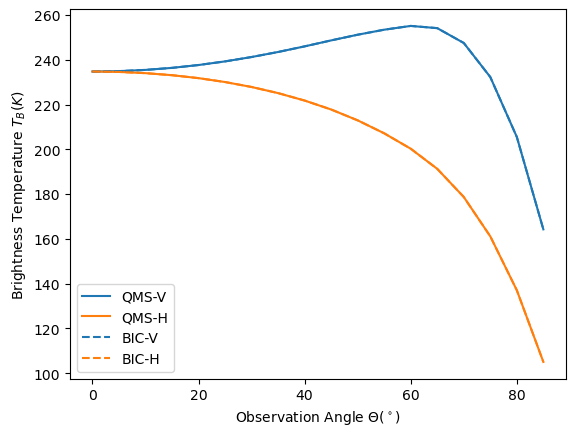

In [15]:
import matplotlib.pyplot as plt

# plot the data
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(theta_obs, TB_v_QMS, color='tab:blue')
ax.plot(theta_obs, TB_h_QMS, color='tab:orange')
ax.plot(theta_obs, TB_v_BIC, color='tab:blue',linestyle='--')
ax.plot(theta_obs, TB_h_BIC, color='tab:orange',linestyle='--')
ax.set(xlabel='Observation Angle $\Theta(^\circ)$', ylabel='Brightness Temperature $T_B(K)$')
ax.legend(['QMS-V', 'QMS-H','BIC-V', 'BIC-H'])